In [2]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
with open('design.pkl','rb') as f:
    set_params = pickle.load(f)
plt.rcParams.update(set_params)

In [104]:
data = {
    'years': [2024, 2025, 2026, 2027],
    'target': [.22, .28, .33, .38],
    'borrowable_perc': [.75, .5, .25, 0],
    'co2_cap': [.25, .25, .25, 0],
    # 'alt_co2_cap': [.25, .2, .1, 0],
    'car_sales': [120, 120, 120, 120],
    'nonzev_sales': [100, 100, 100, 100],
    'co2_average': [140, 140, 140, 140],
    'co2_target': [150, 150, 150, 150]
}

In [120]:
df = pd.DataFrame(data)
# Apply the 25% cap to the ZEV mandate target, i.e. cap * target
df['co2able_perc'] = df.apply(lambda row: (row.co2_cap * row.target), axis=1)

# Calculate an alternative CO2 cap, which decreases 25%, 20%, 10%
# df['alt_co2able_perc'] = df.apply(lambda row: 100*(row.alt_co2_cap * row.target), axis=1)

# Calculate CO2 activity as Non-zev sales multiplied by the target
df['co2_permissible_activity'] = df.nonzev_sales * df.co2_target

df['co2_implied_permissible_activity'] = (df.co2_permissible_activity - 167*(df.co2able_perc * df.car_sales))
# df['alt_co2_implied_permissible_activity'] = ((df.nonzev_sales * df.co2_target) - (df.alt_co2able_perc * df.car_sales))
df['co2_implied_target'] = df['co2_implied_permissible_activity']/df.nonzev_sales
# df['alt_co2_implied_target'] = df.alt_co2_implied_permissible_activity/df.nonzev_sales

df['transferred'] = df.co2_permissible_activity - df.co2_implied_permissible_activity

In [121]:
df

,years,target,borrowable_perc,co2_cap,car_sales,nonzev_sales,co2_average,co2_target,co2able_perc,co2_permissible_activity,co2_implied_permissible_activity,co2_implied_target,transferred
0,2024,0.22,0.75,0.25,120,100,140,150,0.0550,15000,13897.8,138.978,1102.2
1,2025,0.28,0.50,0.25,120,100,140,150,0.0700,15000,13597.2,135.972,1402.8
2,2026,0.33,0.25,0.25,120,100,140,150,0.0825,15000,13346.7,133.467,1653.3
3,2027,0.38,0.00,0.00,120,100,140,150,0.0000,15000,15000.0,150.000,0.0


Text(0.5, 0, 'Scheme Years')

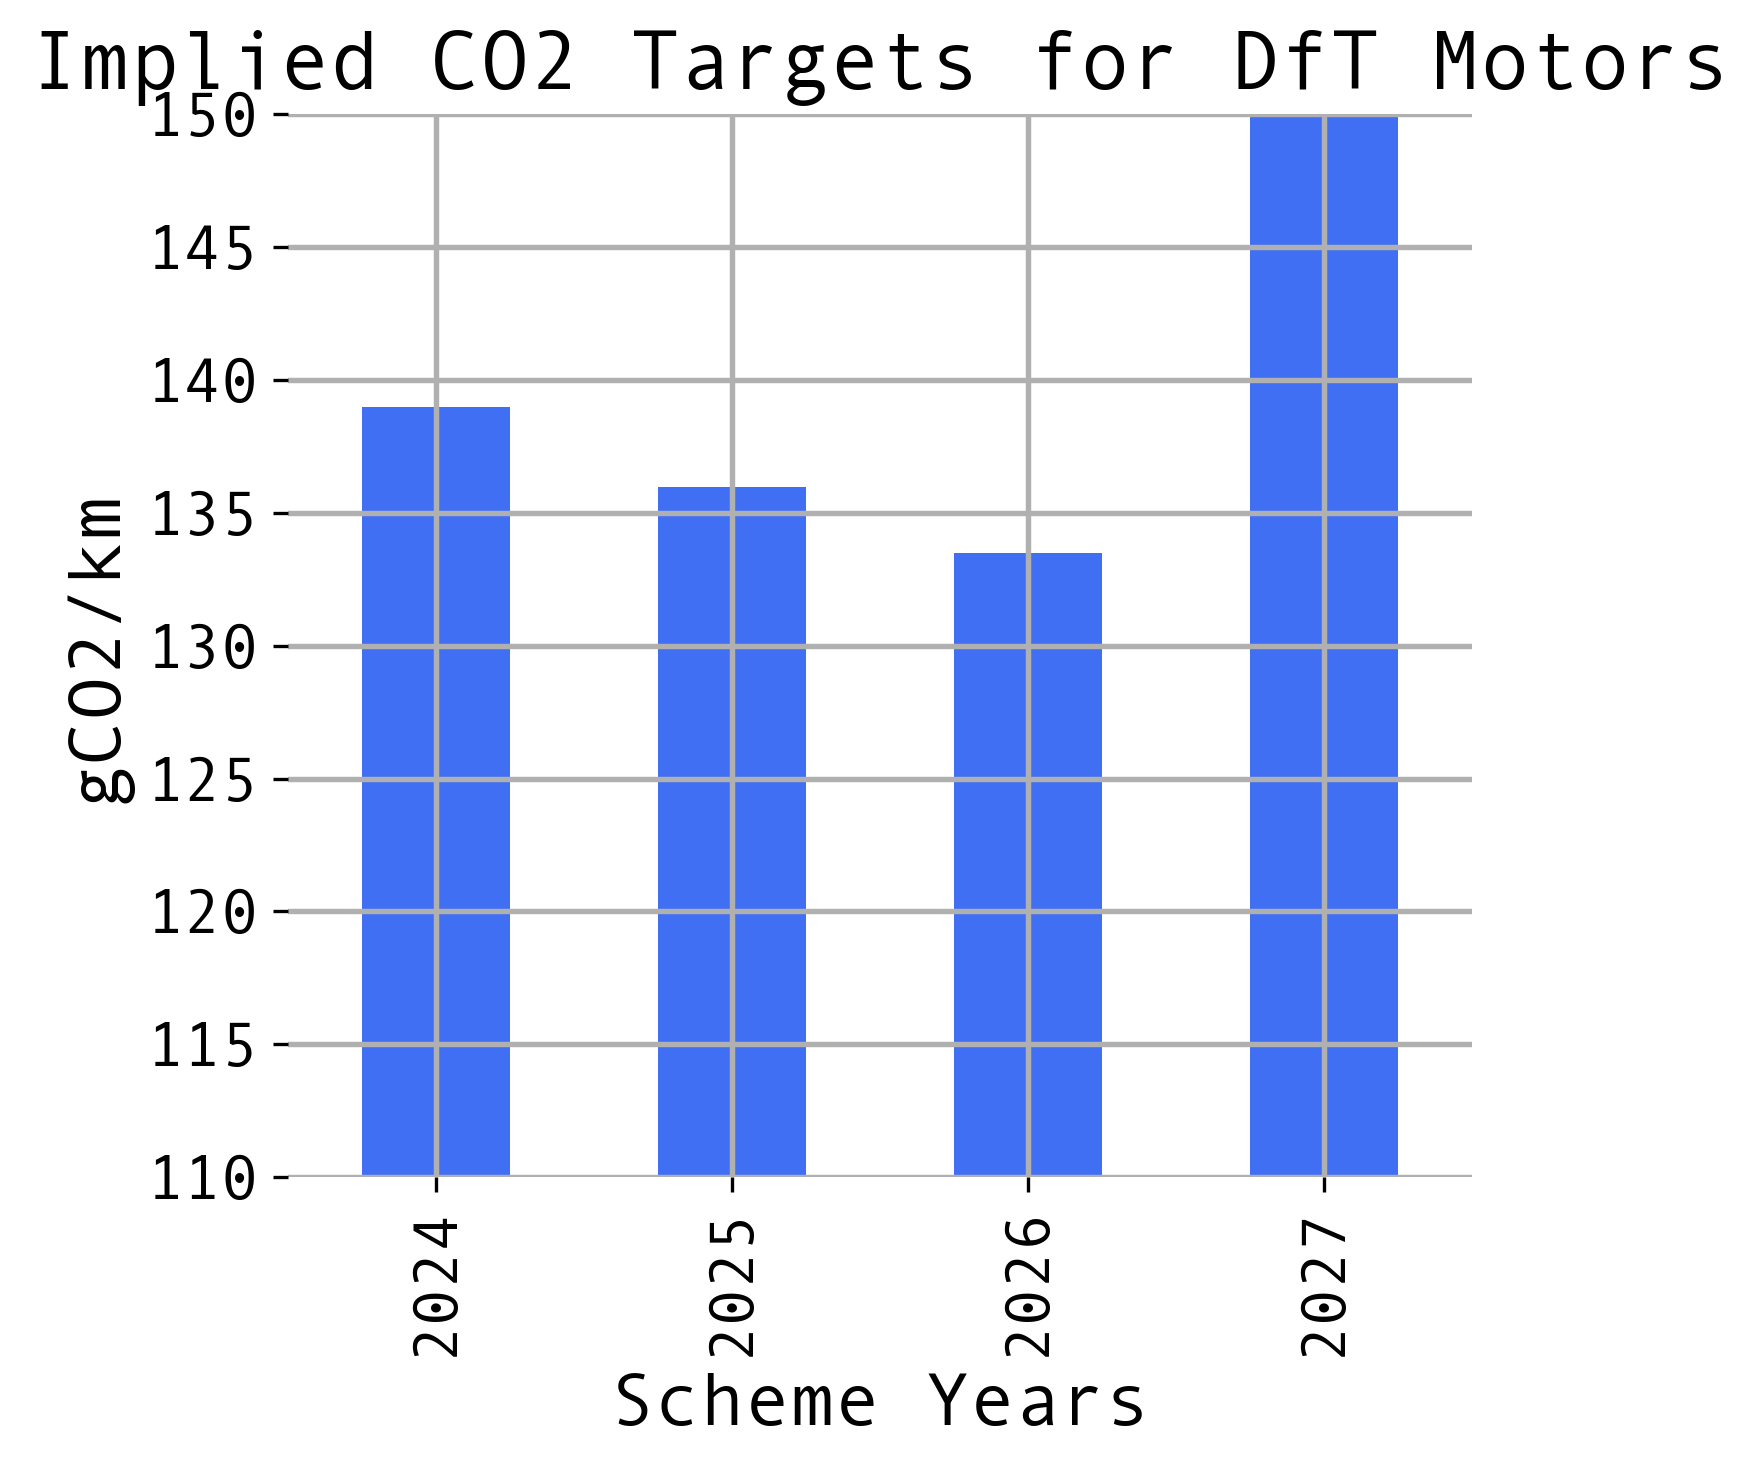

In [122]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

df.plot.bar(x='years', y='co2_implied_target', ax=ax, legend=False)
ax.set_ylim(110, 150)
# df.plot(x='years', y='alt_co2_implied_target', ax=ax, label='NA alternative')
# df.plot(x='years', y='co2_average', ax=ax, label='Actual mean WLTP ratings')
ax.set_title('Implied CO2 Targets for DfT Motors')
ax.set_ylabel('gCO2/km')
ax.set_xlabel('Scheme Years')



In [124]:
df

,years,target,borrowable_perc,co2_cap,car_sales,nonzev_sales,co2_average,co2_target,co2able_perc,co2_permissible_activity,co2_implied_permissible_activity,co2_implied_target,transferred
0,2024,0.22,0.75,0.25,120,100,140,150,0.0550,15000,13897.8,138.978,1102.2
1,2025,0.28,0.50,0.25,120,100,140,150,0.0700,15000,13597.2,135.972,1402.8
2,2026,0.33,0.25,0.25,120,100,140,150,0.0825,15000,13346.7,133.467,1653.3
3,2027,0.38,0.00,0.00,120,100,140,150,0.0000,15000,15000.0,150.000,0.0
